<a href="https://colab.research.google.com/github/youdanzh/CIS700-projects/blob/main/Copy_of_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import torch as tr
import matplotlib.pyplot as pt
from tqdm.notebook import trange
import numpy as np

In [ ]:
examples = []
header = True

with open("data/00001", "r") as f:
  counter = 0
  clause = ""
  for line in f:
    counter += 1
    if line[0] == "T" and counter == 3:
      clause = line[2:]
    if line[0] in "+-":
      header = False
      label = 0 if line[0] == "-" else 1
    elif not header:
      clause_steps = line[2:]+ " & " + clause 
      #print(clause_steps)
      examples.append((clause_steps.strip(),label))
      
for e,(example,label) in enumerate(examples[:10]):
  print(label, example)
for i in range(10):
  print(examples[i])
len(examples)

1 c==> c/\ creal_ge creal_of_int f0 creal_of_num cNUMERAL c_0 c/\ creal_ge creal_of_int f1 creal_of_num cNUMERAL c_0 c/\ creal_ge creal_of_int f2 creal_of_num cNUMERAL c_0 c/\ creal_ge creal_of_int f3 creal_of_num cNUMERAL c_0 c/\ c/\ creal_ge creal_add creal_mul creal_neg creal_of_num cNUMERAL cBIT1 c_0 creal_of_int f2 creal_add creal_of_int f3 creal_neg creal_of_num cNUMERAL cBIT1 c_0 creal_of_num cNUMERAL c_0 c= creal_of_int f1 creal_of_num cNUMERAL c_0 c/\ c/\ creal_ge creal_add creal_mul creal_neg creal_of_num cNUMERAL cBIT1 c_0 creal_of_int f2 creal_add creal_of_int f3 creal_neg creal_of_num cNUMERAL cBIT1 c_0 creal_of_num cNUMERAL c_0 c= creal_of_int f0 creal_of_num cNUMERAL c_0 creal_ge creal_add creal_mul creal_neg creal_of_num cNUMERAL cBIT1 c_0 creal_of_int f0 creal_add creal_of_int f1 creal_neg creal_of_num cNUMERAL cBIT1 c_0 creal_of_num cNUMERAL c_0 c/\ c/\ creal_ge creal_of_int f0 creal_of_num cNUMERAL c_0 c/\ creal_ge creal_of_int f1 creal_of_num cNUMERAL c_0 c/\ creal_

540

In [ ]:
import os 

examples = []

for file in os.listdir("data/"):
  filename = os.fsdecode(file)
  print(filename)
  header = True
  path = "data/" + filename
  with open(path, "r") as f:
    counter = 0
    clause = ""
    for line in f:
      counter += 1
      if line[0] == "T" and counter == 3:
        clause = line[2:]
      if line[0] in "+-":
        header = False
        label = 0 if line[0] == "-" else 1
      elif not header:
        clause_steps = line[2:]+ " & " + clause
        #print(clause_steps)
        examples.append((clause_steps,label))
'''      
for e,(example,label) in enumerate(examples[:10]):
  print(label,example[:100])
'''
src = []
dst = []
for ex,l in examples:
  src.append(ex)
  dst.append(l)
len(src)
len(dst)

00017
00007
00010
00004
00014
00009
00011
00008
00002
00012
00005
00013
00006
00001
00003
00015
00016


6284

In [ ]:
chrs = "".join([chr(c) for c in range(ord("a"), ord("z"))] + [chr(c) for c in range(ord("A"), ord("Z"))] + ["_"])
print(chrs)

def parse(line):
  tokens = []
  token = ""
  for c in line:
    if c in chrs: token += c
    else:
      tokens.append(token.lstrip())
      token = c
  tokens.append(token.lstrip())
  return tokens

print(parse(examples[0][0]))

abcdefghijklmnopqrstuvwxyABCDEFGHIJKLMNOPQRSTUVWXY_
['c', '=', 'cderived_form', 'c', '/', '\\', 'c', '/', '\\', 'cT', 'cT', 'cT', '', '/', 'creal_mul', '', '*', '', '/', 'creal_mul', '', '*', '', '/', 'b', '1', 'b', '1', '', '*', '', '/', 'b', '1', 'b', '1', 'b', '0', '', '*', '', '/', 'creal_mul', 'creal_mul', 'f', '0', 'f', '0', 'creal_mul', 'f', '1', 'f', '1', 'b', '0', 'creal_add', 'creal_mul', '', '*', '', '/', 'creal_mul', '', '*', '', '/', 'b', '1', 'b', '0', '', '*', '', '/', 'b', '1', 'b', '0', 'f', '2', 'creal_of_num', 'cNUMERAL', 'c_', '0', 'creal_mul', 'creal_add', 'creal_mul', '', '*', '', '/', 'b', '0', 'f', '2', 'creal_of_num', 'cNUMERAL', 'cBIT', '1', 'c_', '0', 'creal_mul', 'creal_of_num', 'cNUMERAL', 'cBIT', '1', 'c_', '0', '', '*', '', '/', 'b', '0', 'f', '2', '', '*', '', '/', 'creal_mul', 'creal_mul', 'f', '0', 'f', '0', 'creal_mul', 'f', '1', 'f', '1', 'f', '2', 'f', '2', 'part', 'cUNIV', 'c', '/', '\\', 'cderived_form', 'c', '/', '\\', 'c', '/', '\\', 'c', '/', '

In [ ]:
all_tokens = set()
for example, label in examples:
  tokens = parse(example) 
  all_tokens |= set(tokens)


all_tokens = list(all_tokens)
lookup = {token: t for (t, token) in enumerate(all_tokens)}

print(lookup)
for token in all_tokens: print(token)
print(len(all_tokens))


{'': 0, 'cflag_list': 1, '6I': 2, 'cis_loop': 3, 'creal_lt': 4, 'creal_of_int': 5, 'crotate_to': 6, 'cAPPEND': 7, '1': 8, 'ctransform_assumption_v': 9, 'cball_annulus': 10, 'cfunlistA_v': 11, 'cfilter': 12, 'cUNIV': 13, 'cn_list': 14, 'cis_restricted': 15, 'co': 16, 'cREVERSE': 17, 'creal': 18, 'cwedge': 19, 'cvector_sub': 20, 'cUNION': 21, 'cGEQ': 22, "'y": 23, 'casn': 24, '4I': 25, 'cscs_am_v': 26, 'ccontent': 27, 'creal_abs': 28, '4': 29, '7': 30, 'creal_max': 31, 'cLET_END': 32, 'cf_list': 33, 'cSUBSET': 34, '\\': 35, 'cmap': 36, 'cNUMERAL': 37, 'cscs_diag': 38, 'ccstab': 39, 'cmonoidal': 40, 'csi': 41, 'cclosed_interval': 42, 'cMEM': 43, '5': 44, 'cLAST': 45, 'cSUC': 46, '>': 47, 'cPOWER': 48, 'cSETSPEC': 49, 'cset_of_list': 50, 'creal_continuous': 51, 'cEMPTY': 52, 'cpsort': 53, 'catreal': 54, '3M': 55, '3': 56, 'crtrans': 57, '!': 58, 'cloop_list': 59, '5T': 60, 'cloop_map': 61, 'cINSERT': 62, 'cnormal_list': 63, 'csin': 64, 'creal_sub': 65, 'cGSPEC': 66, 'creal_add': 67, 'ccnj'

In [ ]:
max_len = max([len(parse(example)) for example,label in examples])
print("max_len:", max_len)
embeddings = tr.eye(len(all_tokens))


max_len: 2669


In [ ]:
"""
Transformer utilities
"""
def embed(seq, max_len, embeddings, offset=0):
    embedded = tr.zeros(max_len, embeddings.shape[1])
    cap = min(len(seq), max_len-offset)
    if cap > 0:
        embedded[offset:offset+cap] = tr.stack(tuple(embeddings[lookup[token]] for token in seq[:cap]))
    return embedded

def Attention(Q, K, V, masked=False):
    dk = Q.shape[1]
    logits = Q @ K.t() / dk**.5
    if masked:
        idx = tr.arange(Q.shape[0])
        logits[idx.unsqueeze(1) < idx] = -tr.inf
    return tr.softmax(logits, dim=1) @ V

class MultiHeadAttention(tr.nn.Module):
    def __init__(self, num_heads, d_model, masked=False, projections=""):
        super(MultiHeadAttention, self).__init__()
        dh = d_model // num_heads
        self.masked = masked
        self.num_heads = num_heads
        self.WQ, self.WK, self.WV = tuple(
            tr.nn.ModuleList([tr.nn.Linear(d_model, dh, bias=False) for i in range(num_heads)])
            if p in projections else [lambda x: x[:,:dh]]*num_heads
            for p in "QKV")
        self.WO = tr.nn.Linear(dh * num_heads, d_model, bias=False) if "O" in projections else lambda x: x
        self.ln = tr.nn.LayerNorm(d_model)
        self.projections = projections

    def forward(self, Q, K, V):
        heads = [
            Attention(self.WQ[i](Q), self.WK[i](K), self.WV[i](V), self.masked)
            for i in range(self.num_heads)]
        out = self.WO(tr.cat(heads, dim=1))
        out += Q # skip connection
        out = self.ln(out) # layer normalization
        return out

# requires d_model - d_embedding >= max_len
def one_hot_positional_encoder(max_len):
    def encode_position(inputs):
        I = tr.eye(max_len)
        return tr.cat((I, inputs), dim=1)
    return encode_position



In [ ]:
class Net(tr.nn.Module):
  def __init__(self, num_blocks, num_heads):
    super(Net, self).__init__()
    d_model = max_len+embeddings.shape[1]
    self.encoder = one_hot_positional_encoder(max_len)
    self.blocks = tr.nn.ModuleList([
      MultiHeadAttention(num_heads, d_model, projections="QKVO")
      for _ in range(num_blocks)
    ])
    self.readout = tr.nn.Linear(d_model, 2)
  def forward(self, example):
    x = embed(parse(example), max_len, embeddings)
    x = self.encoder(x)
    for mha in self.blocks:
      x = mha(x, x, x)
    y = self.readout(x).mean(dim=0).unsqueeze(0)
    return y

net = Net(2, 4)
y = net(examples[0][0])
print(y)

tensor([[ 0.0822, -0.0587]], grad_fn=<UnsqueezeBackward0>)


In [ ]:
validation = []
header = True

with open("data/00017", "r") as f:
  counter = 0
  clause = ""
  for line in f:
    counter += 1
    if line[0] == "T" and counter == 3:
      clause = line[2:]
    if line[0] in "+-":
      header = False
      label = 0 if line[0] == "-" else 1
    elif not header:
      clause_steps = line[2:] + " & " + clause
      #print(clause_steps)
      validation.append((clause_steps.strip(),label))
      
print(validation)

[('c= cderived_form c/\\ c/\\ cT cT cT / creal_mul * / creal_mul * / b1 b1 * / b1 b1 b0 * / creal_mul creal_mul f0 f0 creal_mul f1 f1 b0 creal_add creal_mul * / creal_mul * / b1 b0 * / b1 b0 f2 creal_of_num cNUMERAL c_0 creal_mul creal_add creal_mul * / b0 f2 creal_of_num cNUMERAL cBIT1 c_0 creal_mul creal_of_num cNUMERAL cBIT1 c_0 * / b0 f2 * / creal_mul creal_mul f0 f0 creal_mul f1 f1 f2 f2 part cUNIV c/\\ cderived_form c/\\ c/\\ c/\\ c/\\ cT c/\\ cT c/\\ cT c/\\ cT c/\\ c/\\ cT cT cT c/\\ cT c/\\ cT c/\\ cT cT cT cT / creal_sub * / creal_sub * / creal_sub * / creal_mul * / creal_mul f3 f3 b1 * / creal_mul * / creal_mul f1 f1 b1 * / creal_add * / creal_mul f4 f4 b1 * / creal_add * / creal_sub creal_mul f5 f5 creal_mul f3 f3 b1 * / creal_add * / creal_mul * / b1 b1 * / b1 b1 b1 * / creal_sub creal_mul f0 f0 creal_mul f1 f1 b1 b1 b1 b1 b1 b1 * / creal_mul * / creal_mul f5 f5 b1 * / creal_mul * / creal_mul f3 f3 b1 * / creal_mul * / b1 b1 * / b1 b1 b1 b1 b1 b1 * / creal_mul creal_mul f4

In [ ]:
print(net(validation[1][0]))

tensor([[ 0.0278, -0.0148]], grad_fn=<UnsqueezeBackward0>)


  0%|          | 0/200 [00:00<?, ?it/s]

loss: 0.7168729901313782
val_acc: 0.5
loss: 0.7666082978248596
val_acc: 0.4
loss: 0.6556968688964844
val_acc: 0.30000000000000004
loss: 0.7848762273788452
val_acc: 1.0
loss: 0.99754798412323
val_acc: 0.30000000000000004
loss: 0.5787806510925293
val_acc: 0.6
loss: 0.5797520875930786
val_acc: 0.6
loss: 0.4204747974872589
val_acc: 0.8
loss: 0.8077718615531921
val_acc: 0.5
loss: 0.6826273798942566
val_acc: 0.8
loss: 0.5882868766784668
val_acc: 0.7


Text(0, 0.5, 'Loss')

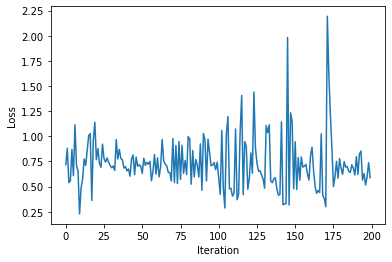

In [ ]:
net = Net(2, 4)
xc = tr.nn.CrossEntropyLoss()

opt = tr.optim.Adam(net.parameters(), lr=0.0001)

num_iters = 200
verb_step = 20
train_loss = []
valid_accu =[]
for i in trange(num_iters):

    example, label = random.choice(examples)
    logits = net(example)
    loss = xc(logits, tr.tensor([label]))
    train_loss.append(loss.item())

    opt.zero_grad()
    loss.backward()
    opt.step()
    correct = []
    if i % verb_step == 0 or i == num_iters-1: 
      print("loss:",loss.item())
      with tr.no_grad():
         for i in range(20):
           example_2, label_2 = random.choice(validation)
           logits = net(example_2)
           pred = logits.argmax()
           correct.append(np.absolute(label_2-pred))
      accuracy =1-np.mean(correct)
    #valid_accu.append(accuracy)
      print("val_acc:",accuracy)
              

#pt.plot(prediction)
pt.plot(train_loss)
pt.xlabel("Iteration")
pt.ylabel("Loss")